<a href="https://colab.research.google.com/github/AmiteshPuri/object-detection/blob/main/racoon_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
!nvidia-smi

Fri Mar  3 05:53:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    26W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import os
Home=os.getcwd()
print(Home)

/content


In [4]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()



Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display,Image

In [6]:
%cd {Home}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 6.79MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 14.6MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 14.3ms
Speed: 0.5ms pre-process, 14.3ms inference, 41.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


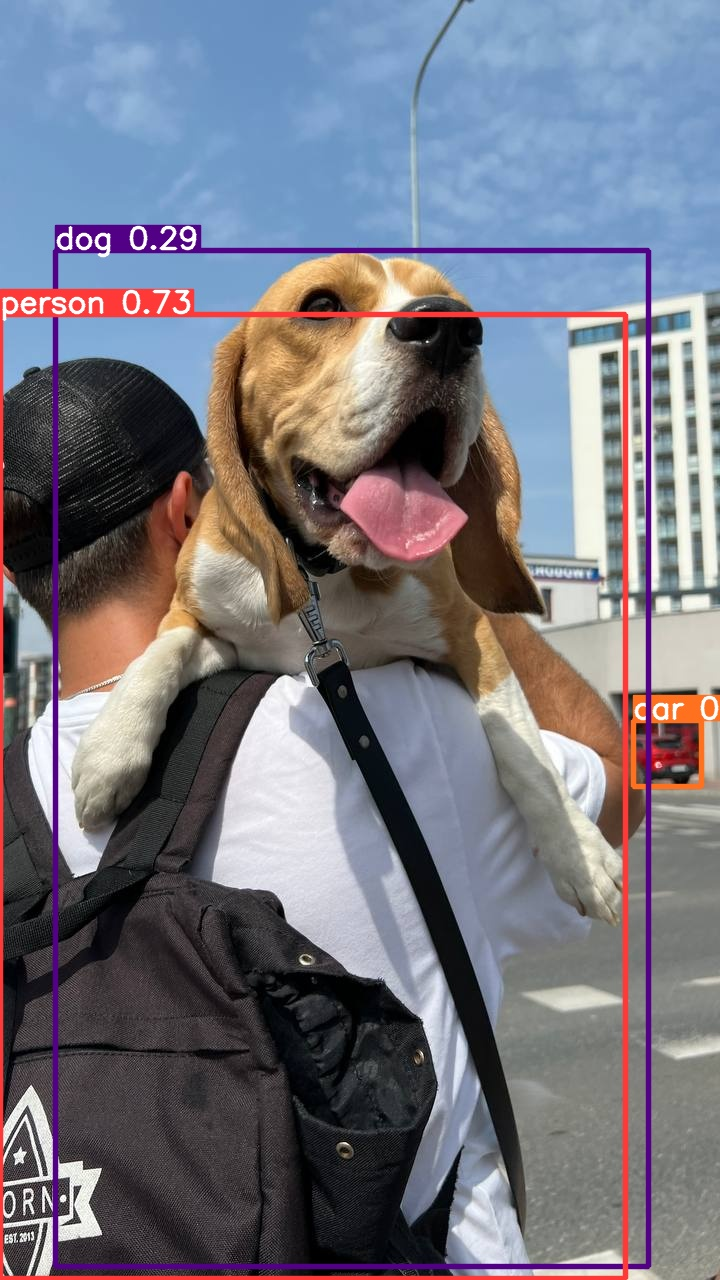

In [7]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)


In [8]:
!mkdir {Home}/datasets
%cd {Home}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RWNNzISE9nCWzcotJKK7")
project = rf.workspace("university-r1rp0").project("detect-raccoon")
dataset = project.version(1).download("yolov8")



/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=588692224ae5af904dbd7bb0d8e0f4a91d5dc5147217891fcb8d75dd558114a2
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to detect-raccoon-1 in yolov8:: 100%|██████████| 1996/1996 [00:00<00:00, 2822.35it/s]


In [9]:
%cd {Home}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:09<00:00, 2.37MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/detect-raccoon-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, kera

In [10]:
!ls {Home}/runs/detect/train/

args.yaml					    train_batch2.jpg
events.out.tfevents.1677822904.6ca17c63ceb4.1778.0  train_batch5130.jpg
results.csv					    train_batch5131.jpg
results.png					    train_batch5132.jpg
train_batch0.jpg				    weights
train_batch1.jpg


/content


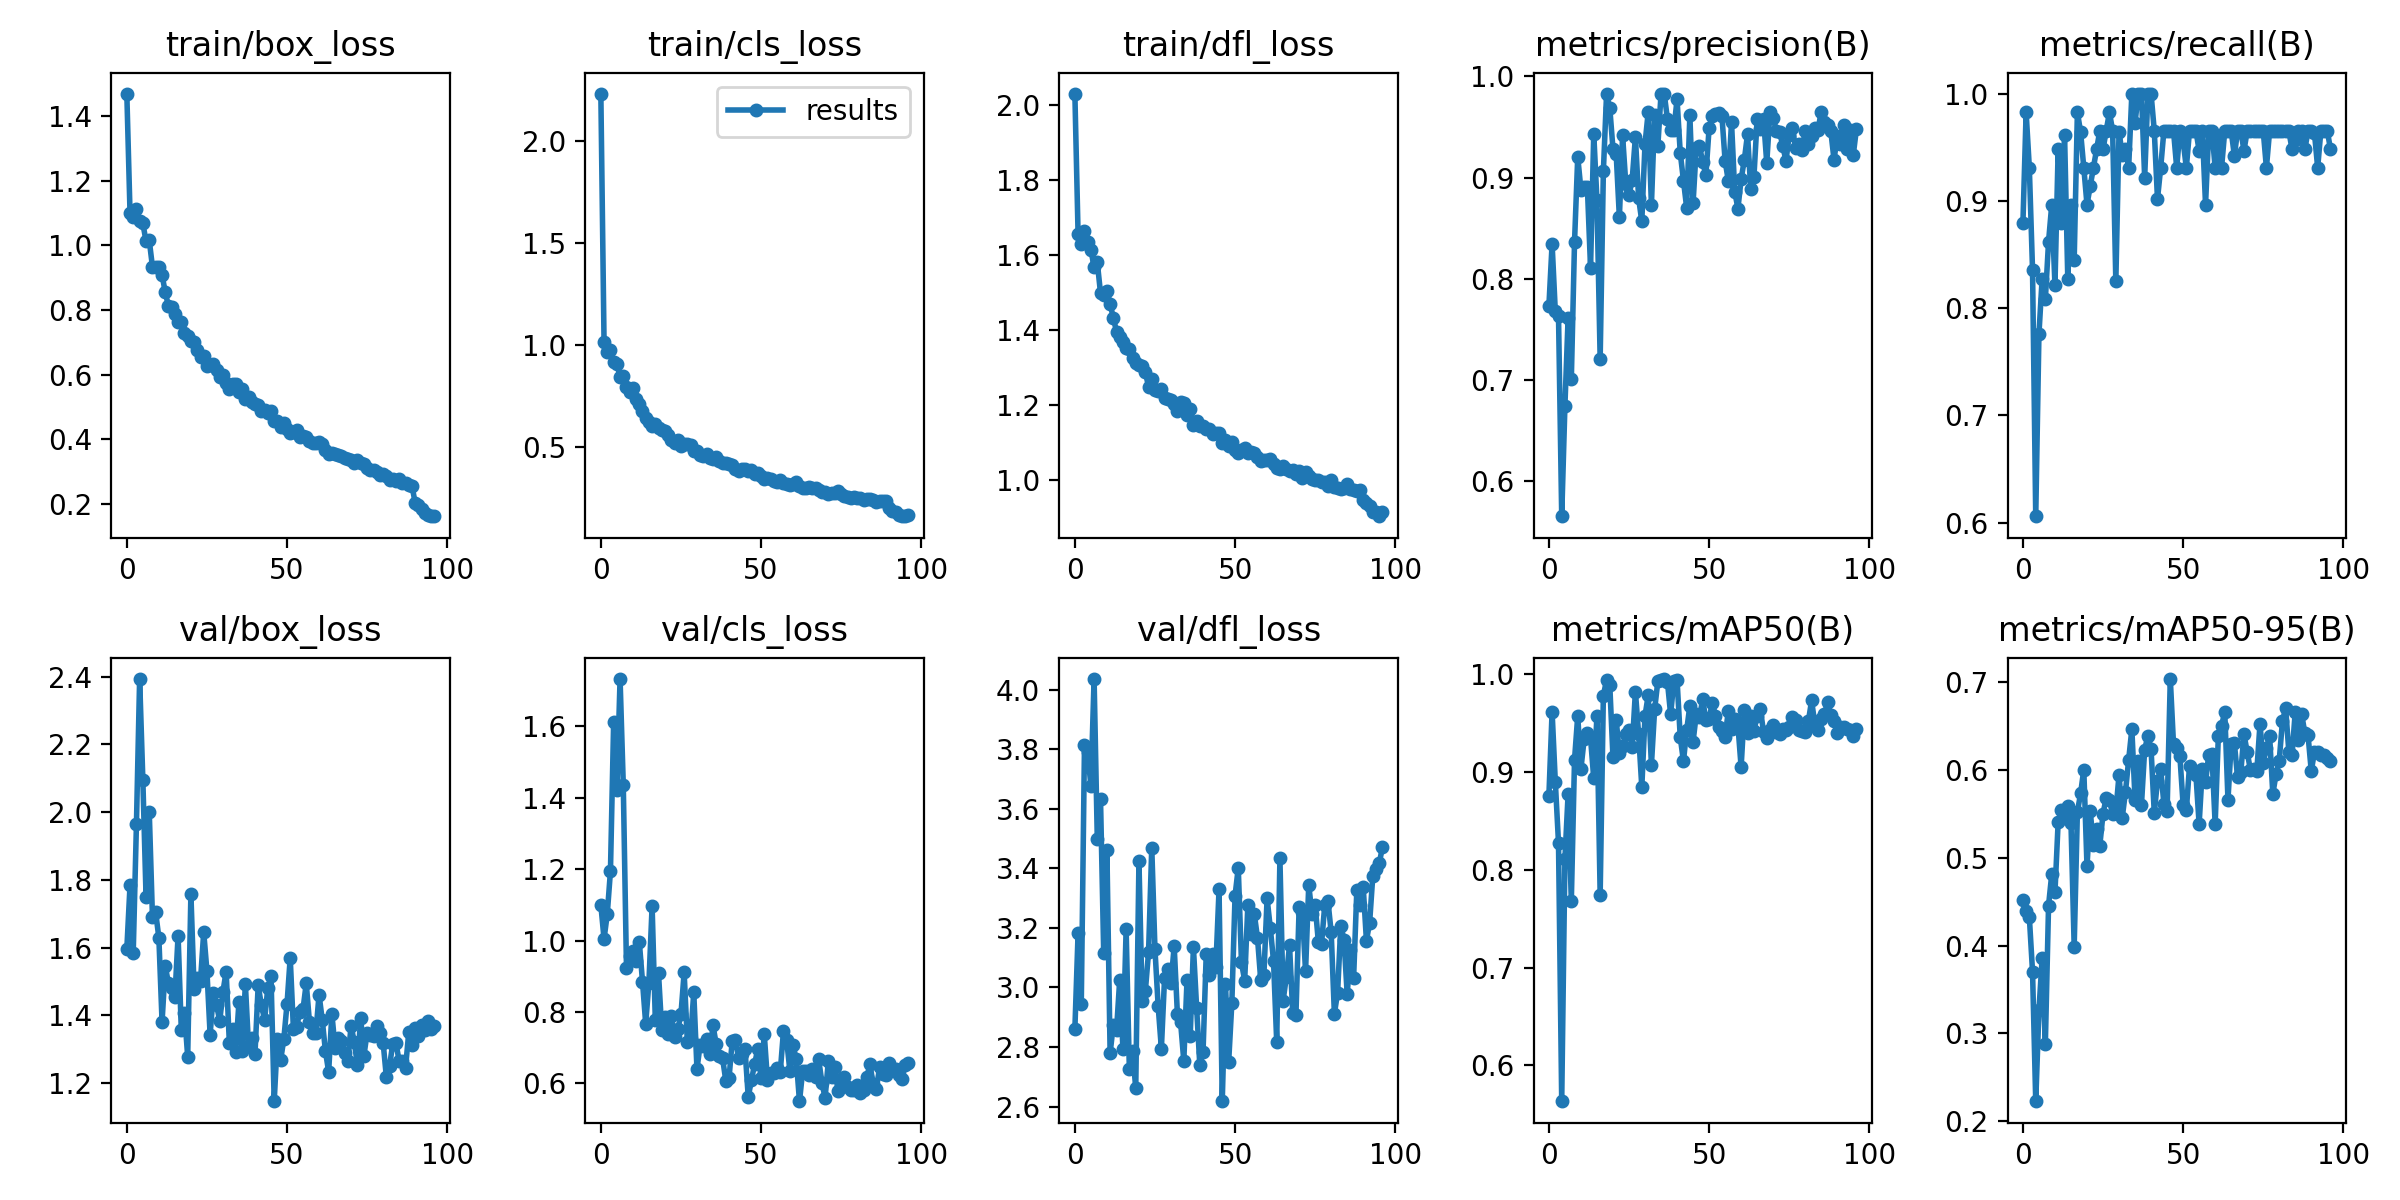

In [11]:
%cd {Home}
Image(filename=f'{Home}/runs/detect/train/results.png', width=800)

In [12]:
%cd {Home}

!yolo task=detect mode=val model={Home}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/detect-raccoon-1/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.22it/s]
                   all         58         58       0.93      0.966      0.959      0.706
Speed: 6.2ms pre-process, 16.8ms inference, 0.0ms loss, 2.5ms post-process per image


In [13]:
%cd {Home}
!yolo task=detect mode=predict model={Home}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/34 /content/datasets/detect-raccoon-1/test/images/raccoon-57_jpg.rf.65612b64341ae9a0c3b7e15e37afe074.jpg: 800x800 1 raccoon, 26.0ms
image 2/34 /content/datasets/detect-raccoon-1/test/images/raccoon-57_jpg.rf.7712f7dedde2afb89ec27f300f36e057.jpg: 800x800 1 raccoon, 26.1ms
image 3/34 /content/datasets/detect-raccoon-1/test/images/raccoon-58_jpg.rf.151a28c7f39954605662714e6b0e13cf.jpg: 800x800 1 raccoon, 26.1ms
image 4/34 /content/datasets/detect-raccoon-1/test/images/raccoon-58_jpg.rf.20431e401be0e03d2bd0bd9313cf042e.jpg: 800x800 1 raccoon, 26.1ms
image 5/34 /content/datasets/detect-raccoon-1/test/images/raccoon-59_jpg.rf.2b847a97c52acfaf9d638dd40502c34e.jpg: 800x800 1 raccoon, 26.1ms
image 6/34 /content/datasets/detect-raccoon-1/test/images/raccoon-59_jpg.rf.f7d4ee81c9af81fe80500bd52cd88865.jpg: 800x800 1

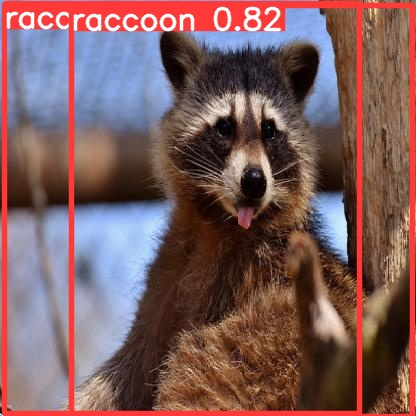

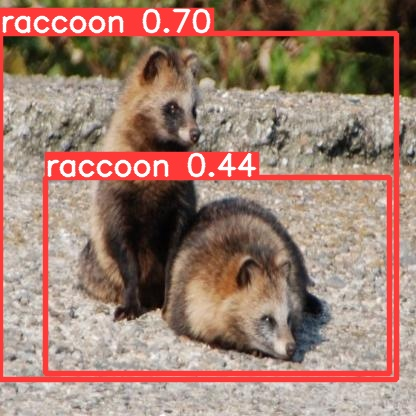

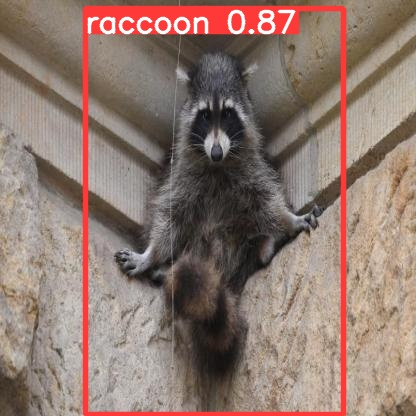

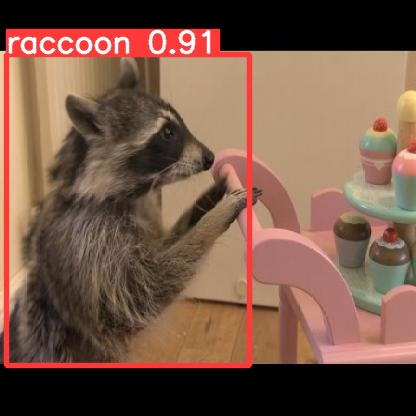

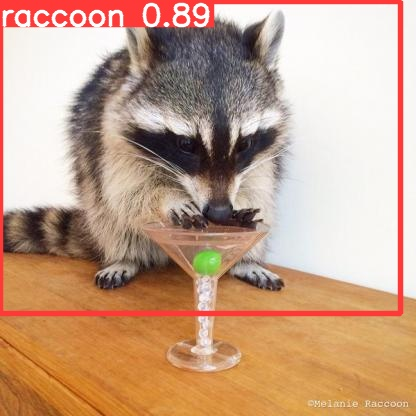

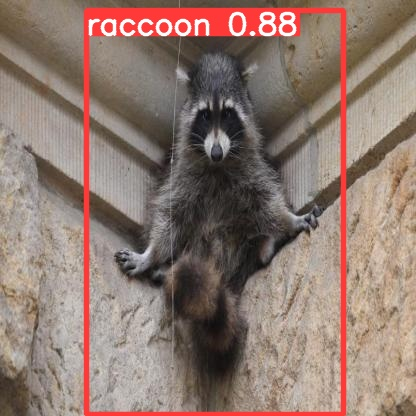

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{Home}/runs/detect/predict2/*.jpg')[:6]:
      display(Image(filename=image_path, width=600))
      print("\n")

## **For** **roboflow** **deployment**

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{Home}/runs/detect/train/")

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# Exporting the best model


In [15]:
!yolo mode=export model={Home}/runs/detect/train/weights/best.pt format=onnx

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from /content/runs/detect/train/weights/best.pt with output shape (1, 5, 13125) (21.5 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling prot

In [18]:
%cd {Home}
!yolo task=detect mode=predict model={Home}/runs/detect/train/weights/best.pt conf=0.25 source=/content/test_video.mp4 save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/4901) /content/test_video.mp4: 480x800 17.2ms
video 1/1 (2/4901) /content/test_video.mp4: 480x800 16.3ms
video 1/1 (3/4901) /content/test_video.mp4: 480x800 16.3ms
video 1/1 (4/4901) /content/test_video.mp4: 480x800 16.4ms
video 1/1 (5/4901) /content/test_video.mp4: 480x800 14.9ms
video 1/1 (6/4901) /content/test_video.mp4: 480x800 14.0ms
video 1/1 (7/4901) /content/test_video.mp4: 480x800 14.0ms
video 1/1 (8/4901) /content/test_video.mp4: 480x800 14.0ms
video 1/1 (9/4901) /content/test_video.mp4: 480x800 14.0ms
video 1/1 (10/4901) /content/test_video.mp4: 480x800 14.0ms
video 1/1 (11/4901) /content/test_video.mp4: 480x800 14.0ms
video 1/1 (12/4901) /content/test_video.mp4: 480x800 14.0ms
video 1/1 (13/4901) /content/test_video.mp4: 480x800 11.2ms
video 1/1 (14/4901) /content/test_video.mp4: 480x800